## BIA Tischi demo
BIA Tischi is a Jupyter-magic based assistant for interacting with data via code

In [1]:
import numpy as np
from bia_tischi import tischi
tischi.__version__

'0.1.0'

We initially give tischi access to all variables in the current scope.

In [2]:
tischi.initialize(globals())

Turn on debug mode to see what happens

In [3]:
# from bia_tischi._machinery import _context
# _context.verbose = True

It works using the `%tischi` and `%%tischi` magic commands. Just enter tasks and ask questions. Hint: if you want to ask a question, you need to put a space before the `?`.

In [4]:
a = 5

In [5]:
%tischi print out the variable a

Here is the simple Python code to print out the value of variable 'a':

```python
print(a)
```

5


Here is your requested Python code:

```python
import matplotlib.pyplot as plt
from skimage import io

# load the image
input_image = io.imread("blobs.tif")

# visualize the image
plt.figure(figsize=(10,10))
plt.imshow(input_image, cmap='gray')
plt.title("Input Image")
plt.axis('off')
plt.show()
```

This code firstly loads the image "blobs.tif" using the imread function from skimage's io module. It then uses matplotlib's pyplot module to create a figure and display the image in grayscale. It also turns off the axis for better visualization.

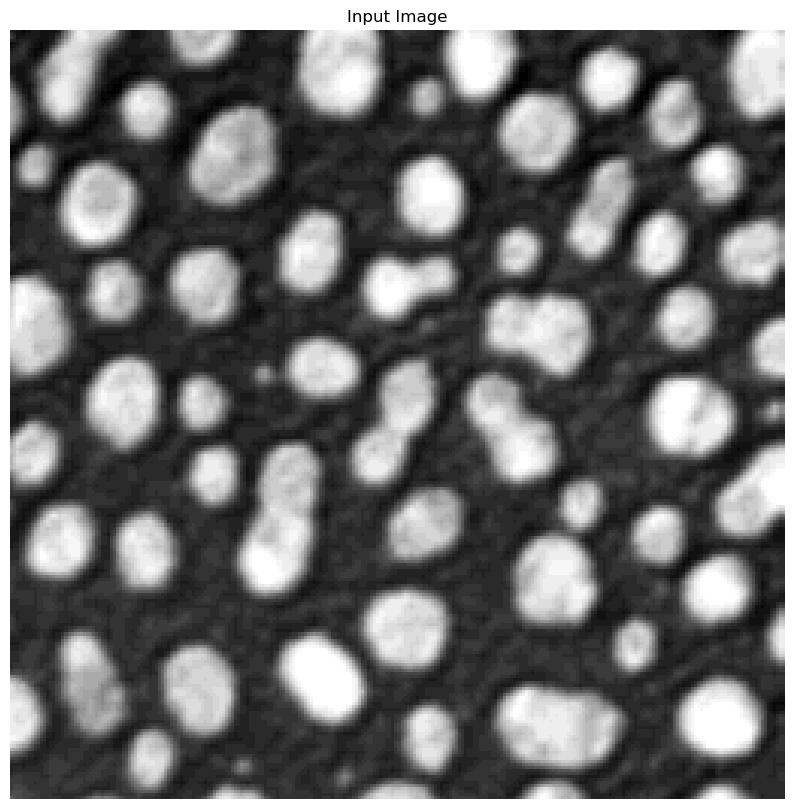

In [6]:
%tischi load "blobs.tif", store it in the variable input_image and visualize it

Here is a Python script that should do what you want. It uses `skimage.filters` to apply Otsu's method for image thresholding, `skimage.measure` to apply connected component labeling, and `matplotlib.pyplot` to visualize the result

```python
from skimage import filters, measure, color
import matplotlib.pyplot as plt

# Apply Otsu's method for image thresholding
threshold_value = filters.threshold_otsu(input_image)
binary_image = input_image > threshold_value

# Apply connected component labeling
label_image = measure.label(binary_image)

# Visualize the result
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(color.label2rgb(label_image, bg_label=0), cmap='nipy_spectral')

plt.show()
```

Please note that it is assumed that the `input_image` is a grayscale image which is usually required for Otsu's method. Also it uses `label2rgb` function for visualizing the labeled image where each label gets mapped to a separate color. It uses the colormap 'nipy_spectral' which is usually good for presentations of such label images. The background label (usually 0) is colored black. If your background label is different, you can change `bg_label` to your value.

Above code can be modified according to the requirements like other color maps can be used for visualization or some other thresholding method can be used if Otsu's method is not working sufficiently well.

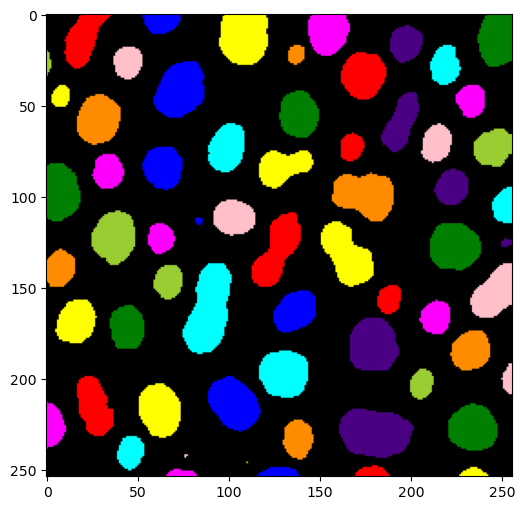

In [7]:
%%tischi 
* Use Otsu's method to segment the image stored in the variable input_image, 
* apply connected component labeling to label individual objects, 
* store the result in the variable label_image, and 
* visualize the result

In [8]:
%tischi print out the number of objects in the label_image

Here is your Python code:

```python
from skimage import measure

# Count the unique elements/objects in the label_image
unique_elements, counts_elements = np.unique(label_image, return_counts=True)

# The number of objects is equal to the number of unique elements minus one, because one of the "objects" is actually the background.
number_of_objects = len(unique_elements) - 1

print("Number of objects in the label_image: ", number_of_objects)
```

This code uses numpy's unique function to count unique elements in the `label_image`. Since one of these elements is the background, we subtract one from the total count to find the number of actual objects. This count is then printed out.

Number of objects in the label_image:  64


In [9]:
%tischi measure mean_intensity and major axis length of the objects in the input_image using the label_image as labels. Store the result in a dataframe called df

Here's how tackle this, leveraging the `skimage.measure` module:

```python
from skimage.measure import regionprops_table
import pandas as pd 

properties_to_measure = ['mean_intensity', 'major_axis_length']
properties = regionprops_table(label_image, intensity_image=input_image, properties=properties_to_measure)

df = pd.DataFrame(properties)
```
This code uses `regionprops_table` to measure the specified properties for the labeled regions defined by `label_image`. The `input_image` is used for property measurements that take intensity into account. The table is then converted into a pandas DataFrame for easier manipulation and analysis.

In [10]:
%tischi show the dataframe df

You can use the print method to display the content of the dataframe.

Here's a Python code to display the dataframe "df":

```python
print(df)
```
Or you can use the display function which may pretty print the dataframe in some pytho environments:
```python
display(df)
```

    mean_intensity  major_axis_length
0       190.854503          34.957399
1       179.286486          21.061417
2       205.617021          30.212552
3       217.327189          24.535398
4       212.142558          31.162612
..             ...                ...
59      128.000000           0.000000
60      183.407407          18.558405
61      181.511111          22.458271
62      188.377358          14.811463
63      172.897959          17.127524

[64 rows x 2 columns]


,mean_intensity,major_axis_length
0,190.854503,34.957399
1,179.286486,21.061417
2,205.617021,30.212552
3,217.327189,24.535398
4,212.142558,31.162612
...,...,...
59,128.000000,0.000000
60,183.407407,18.558405
61,181.511111,22.458271
62,188.377358,14.811463


Here's how you can plot mean_intensity against major_axis_length using matplotlib:

```python
plt.figure(figsize=(10, 6))
plt.scatter(df['mean_intensity'], df['major_axis_length'])
plt.title('Mean Intensity Vs Major Axis Length')
plt.xlabel('Mean Intensity')
plt.ylabel('Major Axis Length')
plt.show()
```

Or, if you prefer to use seaborn for a more aesthetic plot:

```python
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mean_intensity', y='major_axis_length', data=df)
plt.title('Mean Intensity Vs Major Axis Length')
plt.show()
```

Both of these scripts will create a scatter plot showing the relationship between mean intensity and the length of the major axis in your dataframe df.

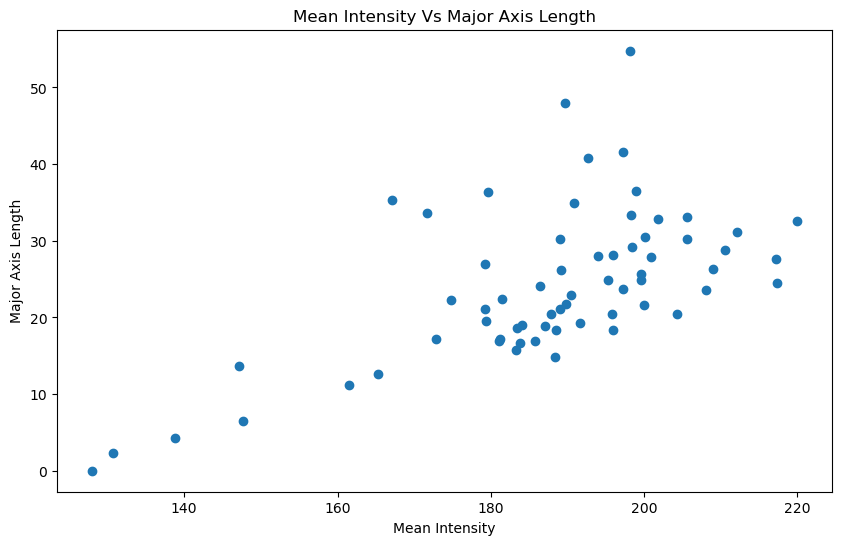

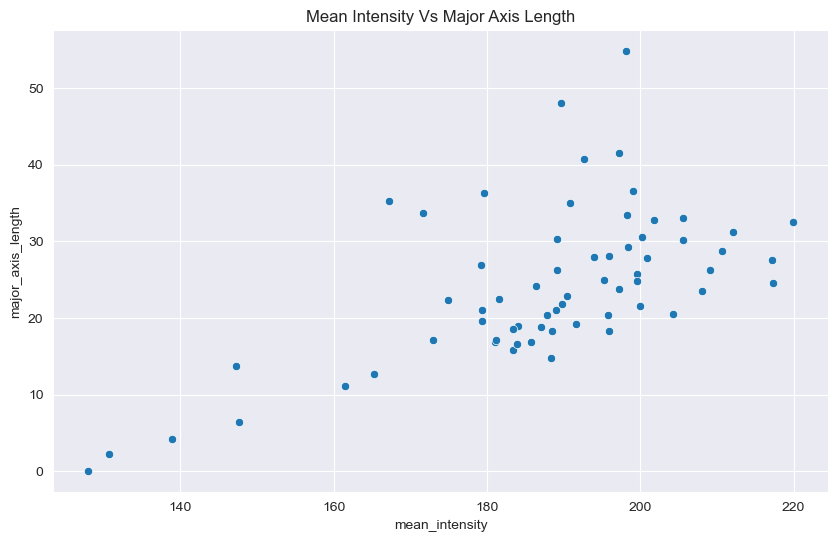

In [12]:
%tischi plot the mean_intensity against major_axis_length in the dataframe df 

#To create and show the histogram of mean_intensity, we first need to calculate this property for each object in our labeled image. 

#Let's calculate the properties using measure.regionprops_table from the skimage library
properties = regionprops_table(label_image, intensity_image=input_image, properties=properties_to_measure)

#Now, let's create a data frame using pandas to store these properties and make the analysis easier
df = pd.DataFrame(properties)

#Now, let's show a histogram of the mean_intensity property using seaborn library
sns.histplot(data=df, x="mean_intensity", bins=30, kde=True)
plt.title('Histogram of Mean Intensity')
plt.xlabel('Mean Intensity')
plt.ylabel('Count')     
plt.grid(True)
plt.show()

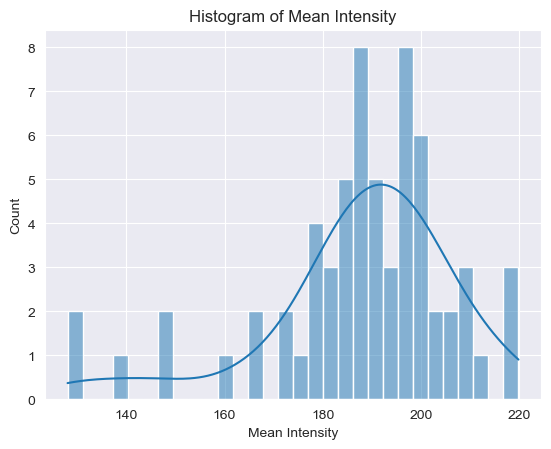

In [13]:
%tischi show a histogram of mean_intensity